CRASH ANACS FOR MONTGOMERY COUNTYALYTICS PROJECT

Introduction
The primary goal of this project is to conduct a comprehensive analysis of traffic crash data across Montgomery County from 2013 to 2017. By examining monthly trends over these years, we aim to provide the UMD community and the general public with insights into the most prevalent types of traffic incidents, as well as the locations and times they most frequently occur. 

Throughout this tutorial, we will explore potential correlations between the types of crashes and their specific locations, the frequency of these incidents at different hours, and how these patterns might vary with the seasons. Our objective is to uncover meaningful trends that can inform safety improvements and awareness initiatives within the community.

Required Tools
You will need to install the following librairies for this project:
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn
- scipy


In [1]:
%pip install -q pandas
%pip install -q numpy
%pip install -q matplotlib
%pip install -q seaborn
%pip install -q scikit-learn
%pip install -q scipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import datetime


In [10]:
crash_df = pd.read_csv('crash.csv')
crash_df.head(20)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Mile Point Direction,Lane Direction,...,Fixed Oject Struck,Junction,Intersection Type,Intersection Area,Road Alignment,Road Condition,Road Division,Latitude,Longitude,Location
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,06/30/2023 10:55:00 PM,No,NaN,NaN,NaN,NaN,...,OTHER,NaN,NaN,NaN,NaN,NaN,NaN,39.244280,-77.335827,"(39.24428009, -77.33582666)"
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,06/30/2023 08:00:00 PM,No,County,1.42,West,North,...,NaN,INTERSECTION,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.092024,-77.070570,"(39.09202433, -77.0705695)"
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,06/29/2023 11:53:00 AM,No,Maryland (State),11.26,North,North,...,CURB,NON INTERSECTION,NaN,INTERSECTION,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, UNPROTECTED PAINTED MIN 4 FEET",39.277424,-77.324644,"(39.27742352, -77.32464379)"
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,07/01/2023 01:48:00 AM,Yes,Municipality,0.07,North,North,...,LIGHT SUPPORT POLE,OTHER,FOUR-WAY INTERSECTION,OTHER,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.074974,-77.113130,"(39.07497432, -77.1131297)"
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,07/01/2023 12:52:00 PM,No,Other Public Roadway,0.00,West,West,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.026492,-77.148288,"(39.02649167, -77.14828833)"
5,MCP2667008J,230031246,Montgomery County Police,Property Damage Crash,06/30/2023 12:00:00 PM,No,County,0.73,North,North,...,NaN,NON INTERSECTION,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, DIVIDED, POSITIVE MEDIAN BARRIER",39.168515,-77.204770,"(39.1685145, -77.20477033)"
6,MCP243600GV,230031419,Montgomery County Police,Property Damage Crash,06/30/2023 06:00:00 PM,Yes,County,1.15,West,East,...,NaN,NaN,NaN,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.017985,-77.018535,"(39.01798542, -77.01853453)"
7,HA2287000N,23001253,Maryland-National Capital,Property Damage Crash,06/29/2023 01:03:00 PM,No,NaN,NaN,NaN,NaN,...,SIGN SUPPORT POLE,NaN,NaN,NaN,NaN,NaN,NaN,39.199238,-77.296527,"(39.19923767, -77.2965275)"
8,MCP33730012,230030580,Montgomery County Police,Injury Crash,06/26/2023 04:26:00 PM,No,County,0.94,East,South,...,NaN,INTERSECTION,FOUR-WAY INTERSECTION,NaN,STRAIGHT,NO DEFECTS,"TWO-WAY, NOT DIVIDED",39.008755,-77.040745,"(39.00875517, -77.04074483)"
9,MCP3376000Y,230031077,Montgomery County Police,Property Damage Crash,06/29/2023 12:59:00 PM,No,NaN,NaN,NaN,NaN,...,TREE SHRUBBERY,NaN,NaN,NaN,NaN,NaN,NaN,39.155839,-77.091168,"(39.1558395, -77.09116817)"


In [11]:
rows, cols = crash_df.shape
print("Rows: " + str(rows) + "\n" + "Columns: " + str(cols))

Rows: 97458
Columns: 44


In [ ]:
for col_names in crash_df.columns:
  print(col_names)

Report Number
Local Case Number
Agency Name
ACRS Report Type
Crash Date/Time
Hit/Run
Route Type
Mile Point
Mile Point Direction
Lane Direction
Lane Number
Lane Type
Number of Lanes
Direction
Distance
Distance Unit
Road Grade
NonTraffic
Road Name
Cross-Street Type
Cross-Street Name
Off-Road Description
Municipality
Related Non-Motorist
At Fault
Collision Type
Weather
Surface Condition
Light
Traffic Control
Driver Substance Abuse
Non-Motorist Substance Abuse
First Harmful Event
Second Harmful Event
Fixed Oject Struck
Junction
Intersection Type
Intersection Area
Road Alignment
Road Condition
Road Division
Latitude
Longitude
Location


For the sake of precise analysis and considering the large file size,
we are only considering columns that seem essential to our analysis,
whilst striping the rest.

If this is not possible, our team would be happy to fix this and consider the
entire dataset.


In [ ]:
columns_to_keep = [
    'Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
    'Crash Date/Time', 'Hit/Run', 'Route Type', 'Mile Point', 'Lane Direction',
    'Lane Number', 'Number of Lanes', 'Direction', 'Road Name', 'Cross-Street Name',
    'At Fault', 'Collision Type', 'Weather', 'Surface Condition', 'Light', 'Traffic Control', 'Latitude', 'Longitude', 'At Fault'
]

filtered_df = crash_df[columns_to_keep]
filtered_df.head(10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Cross-Street Name,At Fault,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,06/30/2023 10:55:00 PM,No,NaN,NaN,NaN,0,...,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,06/30/2023 08:00:00 PM,No,County,1.42,North,1,...,CONNECTICUT AVE,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,06/29/2023 11:53:00 AM,No,Maryland (State),11.26,North,1,...,RAMP 6 FR MD 109 EB TO IS 270 SB,DRIVER,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,07/01/2023 01:48:00 AM,Yes,Municipality,0.07,North,1,...,MCAULIFFE DR,UNKNOWN,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,07/01/2023 12:52:00 PM,No,Other Public Roadway,0.00,West,1,...,WESTLAKE DR,DRIVER,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER
5,MCP2667008J,230031246,Montgomery County Police,Property Damage Crash,06/30/2023 12:00:00 PM,No,County,0.73,North,1,...,STEDWICK RD,DRIVER,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NO CONTROLS,39.168515,-77.204770,DRIVER
6,MCP243600GV,230031419,Montgomery County Police,Property Damage Crash,06/30/2023 06:00:00 PM,Yes,County,1.15,East,0,...,LANARK WAY,DRIVER,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.017985,-77.018535,DRIVER
7,HA2287000N,23001253,Maryland-National Capital,Property Damage Crash,06/29/2023 01:03:00 PM,No,NaN,NaN,NaN,0,...,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,39.199238,-77.296527,DRIVER
8,MCP33730012,230030580,Montgomery County Police,Injury Crash,06/26/2023 04:26:00 PM,No,County,0.94,South,1,...,GEORGIA AVE,DRIVER,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008755,-77.040745,DRIVER
9,MCP3376000Y,230031077,Montgomery County Police,Property Damage Crash,06/29/2023 12:59:00 PM,No,NaN,NaN,NaN,0,...,NaN,DRIVER,SINGLE VEHICLE,CLEAR,NaN,DAYLIGHT,NO CONTROLS,39.155839,-77.091168,DRIVER


In [ ]:
print(filtered_df.dtypes)

Report Number         object
Local Case Number     object
Agency Name           object
ACRS Report Type      object
Crash Date/Time       object
Hit/Run               object
Route Type            object
Mile Point           float64
Lane Direction        object
Lane Number            int64
Number of Lanes        int64
Direction             object
Road Name             object
Cross-Street Name     object
At Fault              object
Collision Type        object
Weather               object
Surface Condition     object
Light                 object
Traffic Control       object
Latitude             float64
Longitude            float64
At Fault              object
dtype: object


In [ ]:
info = filtered_df.count()
info

Report Number        97458
Local Case Number    97458
Agency Name          97458
ACRS Report Type     97458
Crash Date/Time      97458
Hit/Run              97456
Route Type           84463
Mile Point           85120
Lane Direction       85131
Lane Number          97458
Number of Lanes      97458
Direction            85120
Road Name            85130
Cross-Street Name    85120
At Fault             97458
Collision Type       96954
Weather              89511
Surface Condition    82808
Light                96643
Traffic Control      81022
Latitude             97458
Longitude            97458
At Fault             97458
dtype: int64

In [ ]:
null_counts_corrected = filtered_df.isnull().sum()
null_counts_corrected

Report Number            0
Local Case Number        0
Agency Name              0
ACRS Report Type         0
Crash Date/Time          0
Hit/Run                  2
Route Type           12995
Mile Point           12338
Lane Direction       12327
Lane Number              0
Number of Lanes          0
Direction            12338
Road Name            12328
Cross-Street Name    12338
At Fault                 0
Collision Type         504
Weather               7947
Surface Condition    14650
Light                  815
Traffic Control      16436
Latitude                 0
Longitude                0
At Fault                 0
dtype: int64

This indicates there are numerous null values in multiple columns.

In [ ]:
print(filtered_df.duplicated().sum())

0


No duplicates. Thank God :)

In [ ]:
filtered_df['Crash Date/Time'] = pd.to_datetime(filtered_df['Crash Date/Time'])

filtered_df['Crash Date'] = filtered_df['Crash Date/Time'].dt.date
filtered_df['Crash Time'] = filtered_df['Crash Date/Time'].dt.time
filtered_df

<ipython-input-73-ce4f119947e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Crash Date/Time'] = pd.to_datetime(filtered_df['Crash Date/Time'])
<ipython-input-73-ce4f119947e6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Crash Date'] = filtered_df['Crash Date/Time'].dt.date
<ipython-input-73-ce4f119947e6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,NaN,NaN,NaN,0,...,SINGLE VEHICLE,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97453,MCP13660071,180003770,Montgomery County Police,Injury Crash,2018-01-23 06:36:00,No,County,1.72,North,3,...,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,39.062794,-77.116372,NONMOTORIST,2018-01-23,06:36:00
97454,MCP28270022,16009955,Montgomery County Police,Property Damage Crash,2016-02-28 17:10:00,No,Maryland (State),7.53,North,3,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.075443,-77.001442,DRIVER,2016-02-28,17:10:00
97455,HA2433001B,23000434,Maryland-National Capital,Property Damage Crash,2023-03-10 09:35:00,No,NaN,NaN,NaN,0,...,SINGLE VEHICLE,RAINING,NaN,DAYLIGHT,NO CONTROLS,39.150631,-77.305672,DRIVER,2023-03-10,09:35:00
97456,MCP1128003R,15008142,Montgomery County Police,Property Damage Crash,2015-02-19 09:01:00,No,Maryland (State),2.83,North,1,...,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008168,-77.080083,DRIVER,2015-02-19,09:01:00


Convertng dates to ISO format, further making dates and times into two different columns.

In [ ]:
hit_run_mode = filtered_df['Hit/Run'].mode()[0]
filtered_df['Hit/Run'] = filtered_df['Hit/Run'].fillna(hit_run_mode)
na_hit = filtered_df[filtered_df['Hit/Run'].isna()]
na_hit

<ipython-input-74-9468a2630280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Hit/Run'] = filtered_df['Hit/Run'].fillna(hit_run_mode)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time


Imputated the Hit/Run Column as it consisted of two N/A values. The above shows that the N/A values for the Hit/Run Column do not exist anymore.

In [ ]:
filtered_df['Route Type'] = filtered_df['Route Type'].fillna('Unknown')
filtered_df['Route Type'].value_counts()

<ipython-input-75-4899b2222540>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Route Type'] = filtered_df['Route Type'].fillna('Unknown')


Maryland (State)        39119
County                  32674
Unknown                 13009
Municipality             5777
US (State)               3732
Interstate (State)       1647
Other Public Roadway      707
Government                414
Ramp                      357
Service Road               22
Name: Route Type, dtype: int64

In [ ]:
mile_point_median = filtered_df['Mile Point'].median()
print("The median for Mile Point's data is: " + str(mile_point_median))
filtered_df['Mile Point'] = filtered_df['Mile Point'].fillna(mile_point_median)
filtered_df

<ipython-input-76-8da2b8f3d7d1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Mile Point'] = filtered_df['Mile Point'].fillna(mile_point_median)


The median for Mile Point's data is: 1.95


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,NaN,0,...,SINGLE VEHICLE,CLEAR,NaN,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97453,MCP13660071,180003770,Montgomery County Police,Injury Crash,2018-01-23 06:36:00,No,County,1.72,North,3,...,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,39.062794,-77.116372,NONMOTORIST,2018-01-23,06:36:00
97454,MCP28270022,16009955,Montgomery County Police,Property Damage Crash,2016-02-28 17:10:00,No,Maryland (State),7.53,North,3,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.075443,-77.001442,DRIVER,2016-02-28,17:10:00
97455,HA2433001B,23000434,Maryland-National Capital,Property Damage Crash,2023-03-10 09:35:00,No,Unknown,1.95,NaN,0,...,SINGLE VEHICLE,RAINING,NaN,DAYLIGHT,NO CONTROLS,39.150631,-77.305672,DRIVER,2023-03-10,09:35:00
97456,MCP1128003R,15008142,Montgomery County Police,Property Damage Crash,2015-02-19 09:01:00,No,Maryland (State),2.83,North,1,...,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008168,-77.080083,DRIVER,2015-02-19,09:01:00


Using the median to impute missing values in "Mile Point" for robustness against skewed data and outliers.

In [ ]:
for i in ['Lane Direction', 'Road Name', 'Cross-Street Name', 'Route Type', 'Direction', 'Surface Condition']:
  filtered_df[i] = filtered_df[i].fillna('Unknown')

filtered_df

<ipython-input-77-df14b24c3085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[i] = filtered_df[i].fillna('Unknown')
<ipython-input-77-df14b24c3085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[i] = filtered_df[i].fillna('Unknown')
<ipython-input-77-df14b24c3085>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NaN,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,NaN,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97453,MCP13660071,180003770,Montgomery County Police,Injury Crash,2018-01-23 06:36:00,No,County,1.72,North,3,...,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,39.062794,-77.116372,NONMOTORIST,2018-01-23,06:36:00
97454,MCP28270022,16009955,Montgomery County Police,Property Damage Crash,2016-02-28 17:10:00,No,Maryland (State),7.53,North,3,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.075443,-77.001442,DRIVER,2016-02-28,17:10:00
97455,HA2433001B,23000434,Maryland-National Capital,Property Damage Crash,2023-03-10 09:35:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,RAINING,Unknown,DAYLIGHT,NO CONTROLS,39.150631,-77.305672,DRIVER,2023-03-10,09:35:00
97456,MCP1128003R,15008142,Montgomery County Police,Property Damage Crash,2015-02-19 09:01:00,No,Maryland (State),2.83,North,1,...,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008168,-77.080083,DRIVER,2015-02-19,09:01:00


Since "Lane Direction" indicates the direction of the lane in which the incident occurred, I recognize it as a significant piece of information that can affect the understanding of each crash's context. However, without a clear way to deduce the missing directions from other data (unless there's a discernible pattern or correlation with other variables), my safest approach would be to impute these missing values with a placeholder value such as "Unknown". This method acknowledges the missing data without making assumptions that could introduce bias into my analysis.

In [ ]:
import numpy as np
traffic_control_mapping = filtered_df.groupby('Road Name')['Traffic Control'].agg(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

def impute_traffic_control(row):
    if pd.isna(row['Traffic Control']) and row['Road Name'] in traffic_control_mapping:
        return traffic_control_mapping[row['Road Name']]
    else:
        return row['Traffic Control']

filtered_df['Traffic Control'] = filtered_df.apply(impute_traffic_control, axis=1)

filtered_df['Traffic Control'] = filtered_df['Traffic Control'].fillna('Unknown')

filtered_df

<ipython-input-78-912f752b882b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Traffic Control'] = filtered_df.apply(impute_traffic_control, axis=1)
<ipython-input-78-912f752b882b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Traffic Control'] = filtered_df['Traffic Control'].fillna('Unknown')


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97453,MCP13660071,180003770,Montgomery County Police,Injury Crash,2018-01-23 06:36:00,No,County,1.72,North,3,...,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,39.062794,-77.116372,NONMOTORIST,2018-01-23,06:36:00
97454,MCP28270022,16009955,Montgomery County Police,Property Damage Crash,2016-02-28 17:10:00,No,Maryland (State),7.53,North,3,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.075443,-77.001442,DRIVER,2016-02-28,17:10:00
97455,HA2433001B,23000434,Maryland-National Capital,Property Damage Crash,2023-03-10 09:35:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,RAINING,Unknown,DAYLIGHT,NO CONTROLS,39.150631,-77.305672,DRIVER,2023-03-10,09:35:00
97456,MCP1128003R,15008142,Montgomery County Police,Property Damage Crash,2015-02-19 09:01:00,No,Maryland (State),2.83,North,1,...,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008168,-77.080083,DRIVER,2015-02-19,09:01:00


In [ ]:
filtered_df = filtered_df.copy()

def impute_light_condition(row):
    if pd.isna(row['Light']):
        crash_time = row['Crash Time']

        daylight_start = datetime.time(6, 0)
        daylight_end = datetime.time(18, 0)
        dusk_end = datetime.time(19, 0)
        dawn_start = datetime.time(5, 0)

        if daylight_start <= crash_time <= daylight_end:
            return 'DAYLIGHT'
        elif daylight_end < crash_time <= dusk_end:
            return 'DUSK'
        elif dawn_start <= crash_time < daylight_start:
            return 'DAWN'
        else:

            return 'DARK -- UNKNOWN LIGHTING'

    else:
        return row['Light']


if not isinstance(filtered_df['Crash Time'].iloc[0], datetime.time):
    filtered_df['Crash Time'] = pd.to_datetime(filtered_df['Crash Time'], format='%H:%M:%S').dt.time

filtered_df['Light'] = filtered_df.apply(impute_light_condition, axis=1)
filtered_df

<ipython-input-79-9233d4df7f85>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Light'] = filtered_df.apply(impute_light_condition, axis=1)


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Collision Type,Weather,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,CLEAR,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,STRAIGHT MOVEMENT ANGLE,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,SINGLE VEHICLE,CLEAR,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,OTHER,CLOUDY,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97453,MCP13660071,180003770,Montgomery County Police,Injury Crash,2018-01-23 06:36:00,No,County,1.72,North,3,...,SINGLE VEHICLE,RAINING,WET,DARK LIGHTS ON,TRAFFIC SIGNAL,39.062794,-77.116372,NONMOTORIST,2018-01-23,06:36:00
97454,MCP28270022,16009955,Montgomery County Police,Property Damage Crash,2016-02-28 17:10:00,No,Maryland (State),7.53,North,3,...,SAME DIR REAR END,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.075443,-77.001442,DRIVER,2016-02-28,17:10:00
97455,HA2433001B,23000434,Maryland-National Capital,Property Damage Crash,2023-03-10 09:35:00,No,Unknown,1.95,Unknown,0,...,SINGLE VEHICLE,RAINING,Unknown,DAYLIGHT,NO CONTROLS,39.150631,-77.305672,DRIVER,2023-03-10,09:35:00
97456,MCP1128003R,15008142,Montgomery County Police,Property Damage Crash,2015-02-19 09:01:00,No,Maryland (State),2.83,North,1,...,HEAD ON LEFT TURN,CLEAR,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008168,-77.080083,DRIVER,2015-02-19,09:01:00


This code first checks if the "Light" column is missing a value for a given row. If it is, it then determines the light condition based on the "Crash Time" compared to predefined time ranges that represent daylight, dusk, and dawn. For times outside of these ranges, it defaults to "DARK -- UNKNOWN LIGHTING" to reflect a conservative approach during nighttime hours. This method helps to fill in missing data with reasoned assumptions while minimizing potential biases that could arise from more arbitrary imputations.

In [ ]:
filtered_df = filtered_df.copy()

collision_type_by_weather = filtered_df.groupby('Weather')['Collision Type'].apply(lambda x: x.mode()[0] if not x.mode().empty else np.nan).to_dict()

def impute_collision_type(row):
    if pd.isna(row['Collision Type']):
        return collision_type_by_weather.get(row['Weather'], np.nan)
    else:
        return row['Collision Type']

filtered_df['Collision Type'] = filtered_df.apply(impute_collision_type, axis=1)

filtered_df['Collision Type'] = filtered_df['Collision Type'].fillna('Unknown')

The code determines the most common "Collision Type" for each "Weather" condition by grouping the data by "Weather" and calculating the mode of "Collision Type" within each group. This mapping of "Weather" conditions to the most frequent "Collision Type" is stored as a dictionary. Next, the user defines a function that checks if "Collision Type" is missing for a row; if it is, the function attempts to impute the missing value using the "Weather"-to-"Collision Type" mapping. This function is applied to each row of the DataFrame. If "Collision Type" is missing and the row's "Weather" is found in the mapping, the missing "Collision Type" is imputed with the most common type associated with that weather condition. In the end, if still Collision types are missing then they are replaced with the "Unkown" tag to remove bias from the table.

In [ ]:
filtered_df = filtered_df.copy()
weather_mode = filtered_df['Weather'].mode()[0]
filtered_df['Weather'] = filtered_df['Weather'].fillna(weather_mode)

filtered_df.head(10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time,Weather_Condition,Time of Day
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00,clear,Night
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00,clear,Night
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00,clear,Day
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00,adverse,Night
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00,clear,Day
5,MCP2667008J,230031246,Montgomery County Police,Property Damage Crash,2023-06-30 12:00:00,No,County,0.73,North,1,...,DRY,DAYLIGHT,NO CONTROLS,39.168515,-77.204770,DRIVER,2023-06-30,12:00:00,clear,Day
6,MCP243600GV,230031419,Montgomery County Police,Property Damage Crash,2023-06-30 18:00:00,Yes,County,1.15,East,0,...,DRY,DAYLIGHT,NO CONTROLS,39.017985,-77.018535,DRIVER,2023-06-30,18:00:00,clear,Night
7,HA2287000N,23001253,Maryland-National Capital,Property Damage Crash,2023-06-29 13:03:00,No,Unknown,1.95,Unknown,0,...,Unknown,DAYLIGHT,NO CONTROLS,39.199238,-77.296527,DRIVER,2023-06-29,13:03:00,clear,Day
8,MCP33730012,230030580,Montgomery County Police,Injury Crash,2023-06-26 16:26:00,No,County,0.94,South,1,...,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008755,-77.040745,DRIVER,2023-06-26,16:26:00,clear,Day
9,MCP3376000Y,230031077,Montgomery County Police,Property Damage Crash,2023-06-29 12:59:00,No,Unknown,1.95,Unknown,0,...,Unknown,DAYLIGHT,NO CONTROLS,39.155839,-77.091168,DRIVER,2023-06-29,12:59:00,clear,Day


In [ ]:
null_counts_corrected = filtered_df.isnull().sum()
print(null_counts_corrected)

Report Number        0
Local Case Number    0
Agency Name          0
ACRS Report Type     0
Crash Date/Time      0
Hit/Run              0
Route Type           0
Mile Point           0
Lane Direction       0
Lane Number          0
Number of Lanes      0
Direction            0
Road Name            0
Cross-Street Name    0
At Fault             0
Collision Type       0
Weather              0
Surface Condition    0
Light                0
Traffic Control      0
Latitude             0
Longitude            0
At Fault             0
Crash Date           0
Crash Time           0
Weather_Condition    0
Time of Day          0
dtype: int64


# **Hypothesis Testing 2 (T-test):** Number of Crash Incidents v/s. Weather Conditions

**Null Hypothesis (H0):** There is no correlation between weather conditions and the number of crash incidents.

**Alternative Hypothesis (H1):** There is a correlation between weather conditions and the number of crash incidents.

We'll treat "CLEAR" as the clear condition and the rest as adverse conditions, except for "UNKNOWN" and "OTHER", which we might exclude from the analysis or handle separately, depending on your specific requirements.

In [ ]:

def categorize_weather(condition):
    if condition == 'CLEAR':
        return 'clear'
    elif condition in ['UNKNOWN', 'OTHER']:
        return 'exclude'
    else:
        return 'adverse'

filtered_df = filtered_df.copy()

# Apply the categorize_weather function to create a new column 'Weather_Condition'
filtered_df['Weather_Condition'] = filtered_df['Weather'].apply(categorize_weather)

df_test2 = filtered_df[filtered_df['Weather_Condition'] != 'exclude']

df_test2.head(10)

,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Hit/Run,Route Type,Mile Point,Lane Direction,Lane Number,...,Surface Condition,Light,Traffic Control,Latitude,Longitude,At Fault,Crash Date,Crash Time,Weather_Condition,Time of Day
0,MCP2686006F,230031339,Montgomery County Police,Property Damage Crash,2023-06-30 22:55:00,No,Unknown,1.95,Unknown,0,...,Unknown,DARK NO LIGHTS,NO CONTROLS,39.244280,-77.335827,DRIVER,2023-06-30,22:55:00,clear,Night
1,MCP3230004G,230031335,Montgomery County Police,Property Damage Crash,2023-06-30 20:00:00,No,County,1.42,North,1,...,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.092024,-77.070570,DRIVER,2023-06-30,20:00:00,clear,Night
2,MCP12600013,230031067,Montgomery County Police,Injury Crash,2023-06-29 11:53:00,No,Maryland (State),11.26,North,1,...,DRY,DAYLIGHT,STOP SIGN,39.277424,-77.324644,DRIVER,2023-06-29,11:53:00,clear,Day
3,DD55750030,230031365,Rockville Police Departme,Property Damage Crash,2023-07-01 01:48:00,Yes,Municipality,0.07,North,1,...,DRY,DARK LIGHTS ON,NO CONTROLS,39.074974,-77.113130,UNKNOWN,2023-07-01,01:48:00,adverse,Night
4,MCP3010008B,230034141,Montgomery County Police,Property Damage Crash,2023-07-01 12:52:00,No,Other Public Roadway,0.00,West,1,...,DRY,DAYLIGHT,Unknown,39.026492,-77.148288,DRIVER,2023-07-01,12:52:00,clear,Day
5,MCP2667008J,230031246,Montgomery County Police,Property Damage Crash,2023-06-30 12:00:00,No,County,0.73,North,1,...,DRY,DAYLIGHT,NO CONTROLS,39.168515,-77.204770,DRIVER,2023-06-30,12:00:00,clear,Day
6,MCP243600GV,230031419,Montgomery County Police,Property Damage Crash,2023-06-30 18:00:00,Yes,County,1.15,East,0,...,DRY,DAYLIGHT,NO CONTROLS,39.017985,-77.018535,DRIVER,2023-06-30,18:00:00,clear,Night
7,HA2287000N,23001253,Maryland-National Capital,Property Damage Crash,2023-06-29 13:03:00,No,Unknown,1.95,Unknown,0,...,Unknown,DAYLIGHT,NO CONTROLS,39.199238,-77.296527,DRIVER,2023-06-29,13:03:00,clear,Day
8,MCP33730012,230030580,Montgomery County Police,Injury Crash,2023-06-26 16:26:00,No,County,0.94,South,1,...,DRY,DAYLIGHT,TRAFFIC SIGNAL,39.008755,-77.040745,DRIVER,2023-06-26,16:26:00,clear,Day
9,MCP3376000Y,230031077,Montgomery County Police,Property Damage Crash,2023-06-29 12:59:00,No,Unknown,1.95,Unknown,0,...,Unknown,DAYLIGHT,NO CONTROLS,39.155839,-77.091168,DRIVER,2023-06-29,12:59:00,clear,Day


### Count incidents in each weather condition category

In [ ]:
incident_counts = df_test2['Weather_Condition'].value_counts()
print(incident_counts)

clear      73459
adverse    23137
Name: Weather_Condition, dtype: int64


### Visualization

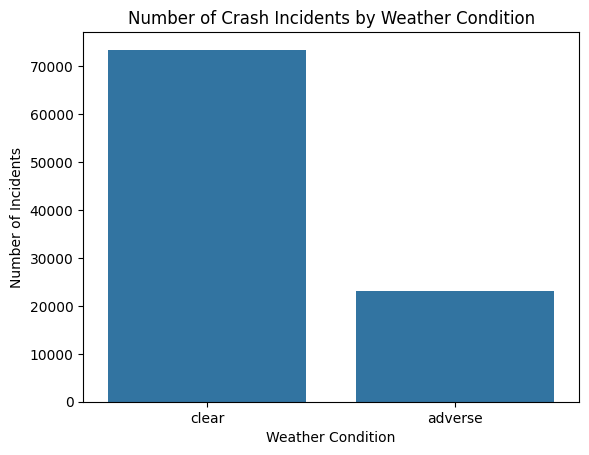

In [ ]:
sns.barplot(x=incident_counts.index, y=incident_counts.values)
plt.title('Number of Crash Incidents by Weather Condition')
plt.ylabel('Number of Incidents')
plt.xlabel('Weather Condition')
plt.show()

### P_Value Testing

In [ ]:
incident_counts_clear = df_test2[df_test2['Weather_Condition'] == 'clear'].groupby('Crash Date/Time').size()
incident_counts_adverse = df_test2[df_test2['Weather_Condition'] == 'adverse'].groupby('Crash Date/Time').size()

print(f"incident_counts_clear: {incident_counts_clear.count()}, incident_counts_adverse: {incident_counts_adverse.count()}")

# Perform a t-test
t_stat, p_val = ttest_ind(incident_counts_clear, incident_counts_adverse, equal_var=False, nan_policy='omit')

print(f"T-statistic: {t_stat}, P-value: {p_val}")

incident_counts_clear: 71915, incident_counts_adverse: 22693
T-statistic: 1.7106789081681824, P-value: 0.08714832492139055


### **Conclusion**

* Based on the provided P-value of approximately 0.087, we would fail to reject the null hypothesis at a significance level of 0.05. This suggests that there is insufficient evidence to conclude a significant correlation between weather conditions and the number of crash incidents.

* However, it's important to note that the P-value is close to the significance threshold, indicating a marginal level of significance. Therefore, while we do not have strong evidence to support a correlation between weather conditions and crash incidents, further investigation with a larger dataset or alternative analytical approaches may be warranted to confirm this finding conclusively.

# **Hypothesis Testing 3 (Chi - Squared Test)**: Time of the Day and Crash Frequency

In [ ]:
def categorize_time_of_day(time):
    if 6 <= time.hour < 18:
        return 'Day'
    else:
        return 'Night'

def hypothesis_testing(df):
    # Make a copy of the DataFrame to avoid manipulating the dataset mistakenly.
    df = df.copy()

    # Convert "Crash Date/Time" to datetime
    df['Crash Date/Time'] = pd.to_datetime(df['Crash Date/Time'])

    # Categorize time of day
    df['Time of Day'] = df['Crash Date/Time'].apply(lambda x: categorize_time_of_day(x))

    # Create contingency table
    contingency_table = pd.crosstab(df['Time of Day'], df['Report Number'])

    # Perform chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print results
    print("Chi-square statistic:", chi2_stat)
    print("P-value:", p_val)

hypothesis_testing(filtered_df)

Chi-square statistic: 97457.99999999999
P-value: 0.4984939641401311


### Graph

Chi-square statistic: 97457.99999999999
P-value: 0.4984939641401311


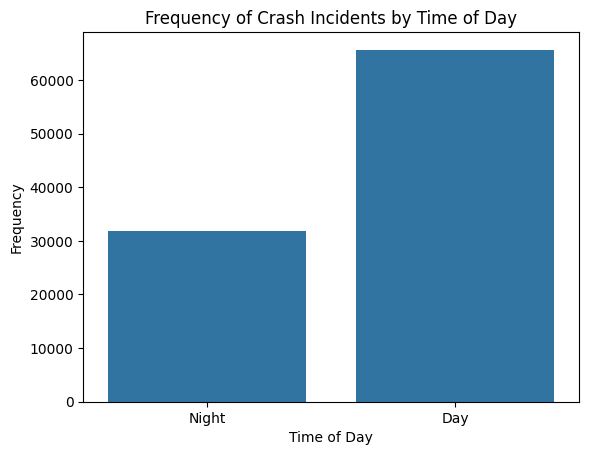

In [ ]:
def make_graph(df):
    sns.countplot(data=df, x='Time of Day')
    plt.title('Frequency of Crash Incidents by Time of Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Frequency')
    plt.show()

hypothesis_testing(filtered_df)